<a href="https://colab.research.google.com/github/kty2253/big_data_project/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B2%98%EB%A6%AC%EB%B0%8F%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

네이버 검색 API를 이용하여 1~3기 신도시를 검색하고

JSON으로 저장받아 JSON파일을 읽어 자연어처리 및 이미지에 맞춰 워드클라우드
생성.

상위 15개의 주요 키워드를 BAR CHART로 나타냄.

이때  STOPWORD.TXT를 이용하여 관련없는 주요키워드를 제외하고 나타냄.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,246 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,535 kB]
Get:13 http://archive.ubuntu.com/ub

E: Package 'python-dev' has no installation candidate


In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


## 한글 단어 분석을 위한 패키지 준비

In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# **자연어 처리 및  word cloud 함수**

In [ ]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud
from PIL import Image
from konlpy.tag import Komoran


class Visualization:
    def __init__(self, wordList):
        self.wordList = wordList
        self.wordDict = dict(wordList)  # list를 사전으로 변경

    def makeWordCloud(self): # 워드 클라우드
        a_color_file = '/content/drive/MyDrive/Colab Notebooks/빅데이터처리/빅데이터프로젝트/한반도.jpg'
        a_coloring = np.array(Image.open(a_color_file))
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        wordcloud = WordCloud(font_path=fontpath,  mask=a_coloring, \
                              relative_scaling=0.2, background_color='lightyellow')
        print(self.wordDict)
        wordcloud = wordcloud.generate_from_frequencies(self.wordDict)

        plt.imshow(wordcloud)
        plt.axis('off')

        filename = 'myWordCloud.png'
        plt.savefig(filename, dpi=400, bbox_inches='tight')
        print(filename + ' 파일이 저장되었습니다.')
        plt.figure(figsize=(16, 8))
    # end def makeWordCloud(wordlist)

    def makeBarChart(self): # 막대 그래프 그리기
        barcount = 15  # 막대 개수 : 15개만 그리겠다.
        xlow, xhigh = - 0.5, barcount - 0.5

        result = self.wordList[:barcount]
        chartdata = []  # 차트 수치
        xdata = []  # 글씨
        mycolor = ['r', 'g', 'b', 'y', 'm', 'c', '#FFF0F0', '#CCFFBB', '#05CCFF', '#11CCFF']

        for idx in range(len(result)):
            chartdata.append(result[idx][1])
            xdata.append(result[idx][0])

            value = str(chartdata[idx]) + '건'  # 예시 : 60건
            plt.text(x=idx, y=chartdata[idx] - 5, s=value, fontsize=8, horizontalalignment='center')

        plt.xticks(range(barcount), xdata, rotation=45)
        plt.bar(range(barcount), chartdata, align='center', color=mycolor)

        plt.title('상위 ' + str(barcount) + '개의 키워드 빈도수')
        plt.xlim([xlow, xhigh])
        plt.xlabel('주요 키워드')
        plt.ylabel('빈도수')
        filename = 'myBarChart.png'
        plt.savefig(filename, dpi=400, bbox_inches='tight')
        print(filename + ' 파일이 저장되었습니다.')
    # end def makeBarChart(wordlist):
# end class Visualization



# 1. 데이터 준비

### 1-1. 파일 읽기

In [ ]:
inputFileName = '/content/drive/MyDrive/Colab Notebooks/빅데이터처리/빅데이터프로젝트/3기 신도시_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '지난달 9일 발표된 신천~하안~신림선 사전타당성 검토용역 결과, 신천~하안~신림선은 시흥시 신천역~광명 시흥 <b>3기신도시</b>~하안2공공주택지구~하안사거리~독산역(1호선)~신독산역(신안산선)~신림역(2호선)을 최적노선으로... ',
  'link': 'https://www.incheonilbo.com/news/articleView.html?idxno=1223639',
  'org_link': 'https://www.incheonilbo.com/news/articleView.html?idxno=1223639',
  'pDate': '2023-12-03 15:34:00',
  'title': '양기대 의원, LH 사장 만나 신천~하안~신림선 포함 요청'},
 {'cnt': 2,
  'description': '수도권 <b>3기 신도시</b> 계획은 2018년 말 문재인 정부 당시 나왔습니다. 그리고 이듬해 하반기에 수도권 인구는 처음으로 국내 인구의 과반을 돌파하는 등 수도권 쏠림 현상은 이어졌습니다. 현 정부 들어서도 서울 인근 신도시... ',
  'link': 'http://www.yonhapnewstv.co.kr/MYH20231203005700641/?input=1825m',
  'org_link': 'http://www.yonhapnewstv.co.kr/MYH20231203005700641/?input=1825m',
  'pDate': '2023-12-03 13:21:00',
  'title': '생활편의·집값·지역발전…행정구역 개편의 동상이몽 [탐사보도 뉴스프리즘]'},
 {'cnt': 3,
  'description': '실제로 지난 11월 9일 발표된 사전타당성 검토용역 결과, 신천~하안~신림선은 시흥시 신천역~광명·시흥 <b>3기신도시</b>~하안2공공주택지구~하안사거리~독산역(1호선)~신독산역(신안산선)~신림역(2호선)을 최적노선으로 하고... ',
  'link': 'https://ww

### 1-2. 분석할 데이터 추출

In [ ]:
message = ''

for item in data:
#    if 'message' in item.keys():
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''

message #출력하여 내용 확인

'지난달 9일 발표된 신천 하안 신림선 사전타당성 검토용역 결과  신천 하안 신림선은 시흥시 신천역 광명 시흥  b 3기신도시  b  하안2공공주택지구 하안사거리 독산역 1호선  신독산역 신안산선  신림역 2호선 을 최적노선으로    수도권  b 3기 신도시  b  계획은 2018년 말 문재인 정부 당시 나왔습니다  그리고 이듬해 하반기에 수도권 인구는 처음으로 국내 인구의 과반을 돌파하는 등 수도권 쏠림 현상은 이어졌습니다  현 정부 들어서도 서울 인근 신도시    실제로 지난 11월 9일 발표된 사전타당성 검토용역 결과  신천 하안 신림선은 시흥시 신천역 광명 시흥  b 3기신도시  b  하안2공공주택지구 하안사거리 독산역 1호선  신독산역 신안산선  신림역 2호선 을 최적노선으로 하고    대표적으로  b 3기 신도시  b 는 대부분 경부고속도로나 경인고속도로  수도권 제1 순환 고속도로 등의 주변부에 자리하고 있습니다  갈수록 심각해지는 초미세먼지도 문제입니다  서울시 산하 서울연구원에 따르면 2016년     b 3기 신도시  b  참여를 공식 요청한 서울주택도시공사 SH공사 가 처음으로 지속가능경영보고서 발간을 추진한다  SH공사는 올 한 해 새 조직을 만드는 등 ESG 환경 사회 지배구조  경영 실천 기반 마련을 위해 역량을    이현재 시장은 그동안 하남시에서 요청한 신도시 현안이 현재까지 해결되지 않고 답보상태에 있는 것에 대해 조속히 해결되기를 요청하며 특히   b 3기 신도시  b 와 관련해   자족기능 강화를 위한 공업지역 확대  신도시    고양  하남 등  b 3기 신도시  b  조성이 예정된 경기도 시 군에서 광역철도사업이 추진되는 가운데  메가시티 서울  구상이 앞으로 추진 동력을 잃게될 것이라는 목소리가 나온다  광역철도사업은 해당 지역 단체장과    실제로 지난달 9일 발표된 신천 하안 신림선 사전타당성 검토용역 결과  신천 하안 신림선은 시흥시 신천역 광명 시흥  b 3기신도시  b  하안2공공주택지구 하안사거리 독산역 1호선

### 1-3. 품사 태깅 : 명사 추출

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['지난달',
 '발표',
 '신천',
 '하안',
 '신림선',
 '사전',
 '타당성',
 '검토',
 '용역',
 '결과',
 '신천',
 '하안',
 '신림선',
 '시흥시',
 '신천역',
 '광명',
 '시흥',
 '신도시',
 '하안',
 '주택',
 '지구',
 '하안',
 '사거리',
 '독산역',
 '호선',
 '독산역',
 '신안산선',
 '신림역',
 '호선',
 '최적',
 '노선',
 '수도권',
 '기',
 '신도시',
 '계획',
 '말',
 '문재인',
 '정부',
 '당시',
 '이듬해',
 '하반기',
 '수도권',
 '인구',
 '처음',
 '국내',
 '인구',
 '과반',
 '돌파',
 '등',
 '수도권',
 '현상',
 '현',
 '정부',
 '서울',
 '인근',
 '신도시',
 '실제',
 '지난',
 '발표',
 '사전',
 '타당성',
 '검토',
 '용역',
 '결과',
 '신천',
 '하안',
 '신림선',
 '시흥시',
 '신천역',
 '광명',
 '시흥',
 '신도시',
 '하안',
 '주택',
 '지구',
 '하안',
 '사거리',
 '독산역',
 '호선',
 '독산역',
 '신안산선',
 '신림역',
 '호선',
 '최적',
 '노선',
 '대표',
 '기',
 '신도시',
 '대부분',
 '경부',
 '고속도로',
 '경인',
 '고속도로',
 '수도권',
 '제',
 '순환',
 '고속도로',
 '등',
 '주변',
 '부',
 '자리',
 '갈수록',
 '초미세먼지',
 '문제',
 '서울시',
 '연구원',
 '기',
 '신도시',
 '참여',
 '공식',
 '요청',
 '주택',
 '시공사',
 '공사',
 '처음',
 '가능',
 '보고서',
 '발간',
 '추진',
 '공사',
 '해',
 '새',
 '조직',
 '등',
 '환경',
 '사회',
 '지배구조',
 '경영',
 '실천',
 '기반',
 '마련',
 '위해',
 '역량',
 '이현재',
 '시장',
 '그동안',
 '하남시'

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'지난달': 5,
         '발표': 104,
         '신천': 62,
         '하안': 50,
         '신림선': 53,
         '사전': 22,
         '타당성': 9,
         '검토': 27,
         '용역': 15,
         '결과': 9,
         '시흥시': 57,
         '신천역': 15,
         '광명': 286,
         '시흥': 251,
         '신도시': 1278,
         '주택': 609,
         '지구': 206,
         '사거리': 8,
         '독산역': 16,
         '호선': 27,
         '신안산선': 8,
         '신림역': 9,
         '최적': 19,
         '노선': 46,
         '수도권': 183,
         '기': 1068,
         '계획': 206,
         '말': 19,
         '문재인': 3,
         '정부': 126,
         '당시': 6,
         '이듬해': 1,
         '하반기': 2,
         '인구': 51,
         '처음': 4,
         '국내': 1,
         '과반': 1,
         '돌파': 1,
         '등': 628,
         '현상': 1,
         '현': 7,
         '서울': 252,
         '인근': 15,
         '실제': 21,
         '지난': 50,
         '대표': 10,
         '대부분': 8,
         '경부': 1,
         '고속도로': 9,
         '경인': 1,
         '제': 64,
         '순환': 2,
      

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

신도시 : 1278
주택 : 609
사업 : 591
추진 : 405
공급 : 289
광명 : 286
공사 : 268
서울 : 252
시흥 : 251
개발 : 251
도시 : 243
참여 : 220
지구 : 206
계획 : 206
시공사 : 203
수도권 : 183
사장 : 165
택지 : 141
경기도 : 132
교통 : 129
정부 : 126
지역 : 123
위해 : 120
광명시 : 120
조성 : 117
토지 : 114
산업 : 113
발표 : 104
규모 : 102
환경 : 99
주거 : 98
최근 : 96
정책 : 96
국토교통부 : 96
골드 : 96
분양 : 91
시민 : 88
신규 : 84
변화 : 83
왕숙 : 81
한국 : 81
진행 : 73
인접 : 70
시설 : 68
김헌 : 68
기존 : 68
청약 : 67
지연 : 67
모빌리티 : 67
통해 : 66
경기 : 65
테크노 : 65
예정 : 64
남양주 : 64
신천 : 62
관련 : 62
단지 : 62
보상 : 62
기업 : 61
추가 : 59
공유 : 59
시흥시 : 57
광역 : 57
의원 : 57
문제 : 56


<class 'str'>
----------------------------------------
['지난달', '일', '발표', '신천', '하안', '신림', '선', '사전', '타당성', '검토', '용역', '결과', '신천', '하안', '신림', '선', '시흥시', '신천역', '광명', '시흥', '기신', '도시', '하안', '공공', '주택지', '구', '하안', '사거리', '독산역', '1호선', '신', '독산역', '신안산선', '신림역', '2호선', '최적', '노선', '.com', '.com', '양기대', '의원', '사장', '신천', '하안', '신림', '선', '포함', '요청', '수도권', '기', '신도시', '계획', '년', '말', '문재인', '정부', '당시', '이듬해', '하반기', '수도권', '인구', '처음', '국내', '인구', '과반', '돌파', '등', '수도권', '현상', '정부', '서울', '인근', '신도시', '.co', '.kr', '.co', '.kr', '생활', '편의', '집값', '지역', '발전', '행정', '구역', '개편', '동상이몽', '탐사보도', '뉴스', '프리즘', '11월 9일', '발표', '사전', '타당성', '검토', '용역', '결과', '신천', '하안', '신림', '선', '시흥시', '신천역', '광명', '시흥', '기신', '도시', '하안', '공공', '주택지', '구', '하안', '사거리', '독산역', '1호선', '신', '독산역', '신안산선', '신림역', '2호선', '최적', '노선', '.com', '.com', '양기대', '사장', '광명', '시흥', '기신', '도시', '광역', '교통', '개선', '대책', '신천', '하안', '신림', '대표', '기', '신도시', '대부분', '경부고속도로', '경인고속도로', '수도권', '순환', '고속도로', '등', '주변부', '자리', '

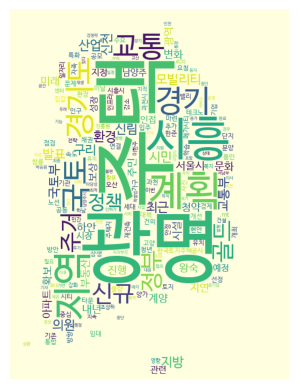

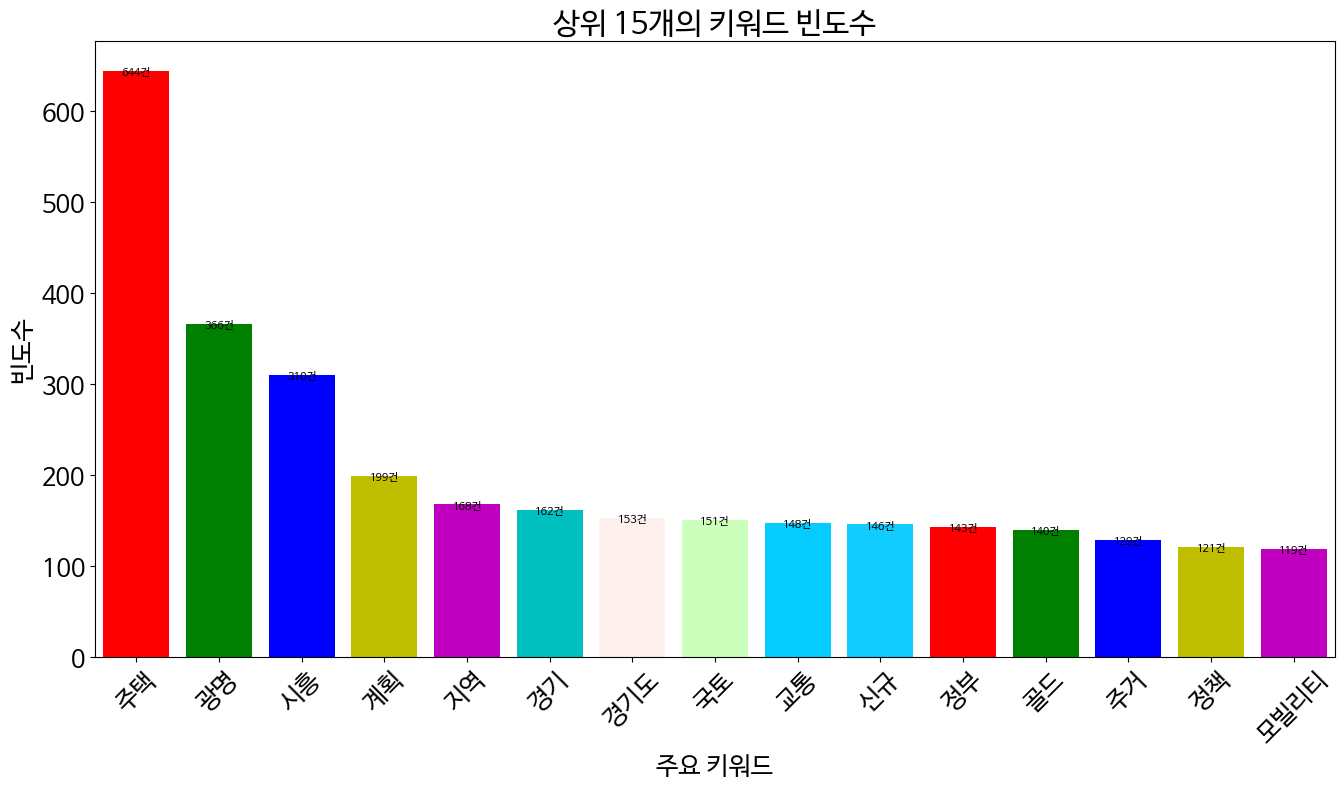

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/빅데이터처리/빅데이터프로젝트/3기 신도시_naver_news.json'
ko_con_text = open(filename, encoding='utf-8').read()
print(type(ko_con_text)) # str
print('-' * 40)

#komo = Komoran(userdic='/content/user_dic.txt')
komo = Komoran()

tokens_ko = komo.nouns(ko_con_text)
print(tokens_ko)
print('-' * 40)
stop_word_file = '/content/drive/MyDrive/Colab Notebooks/빅데이터처리/빅데이터프로젝트/stopword_3기신도시.txt'
stop_file = open(stop_word_file, 'rt', encoding='utf-8')
stop_words = [ word.strip() for word in stop_file.readlines()]

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens=tokens_ko)

print(type(ko))  # <class 'nltk.text.Text'>
print(type(ko.vocab()))  # <class 'nltk.probability.FreqDist'>
print(type(ko.vocab().most_common(50)))  # <class 'list'>

data = ko.vocab().most_common(500)
wordlist = list()  # 튜플(단어, 빈도수)을 저장할 리스트

for word, count in data :
    # count는 빈도수를 의미하고, len(word)는 단어의 길이를 의미합니다.
    if (count >= 1 and len(word) >= 2) :
        wordlist.append((word, count))

print(wordlist)
visual = Visualization(wordlist)
visual.makeWordCloud()
visual.makeBarChart()

print('완료되었습니다.')
